# Detecting and Recognizing digits with Tesseract

## Importing libraries

In [1]:
from imutils import paths
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt

## Setting the dataset

In [2]:
dataset = 'dataset'
pathImages = list(paths.list_images(dataset))

In [3]:
pathImages

['dataset/businesscard_square-original-rounded_corners-mattelam-inch-2400x906.png',
 'dataset/d0f4a37-business_card_original.jpg',
 'dataset/black-and-white-business-card-design-template-492df36ff5e300196934b6a3257b42c0_screen.jpg']

## Visualizing the images

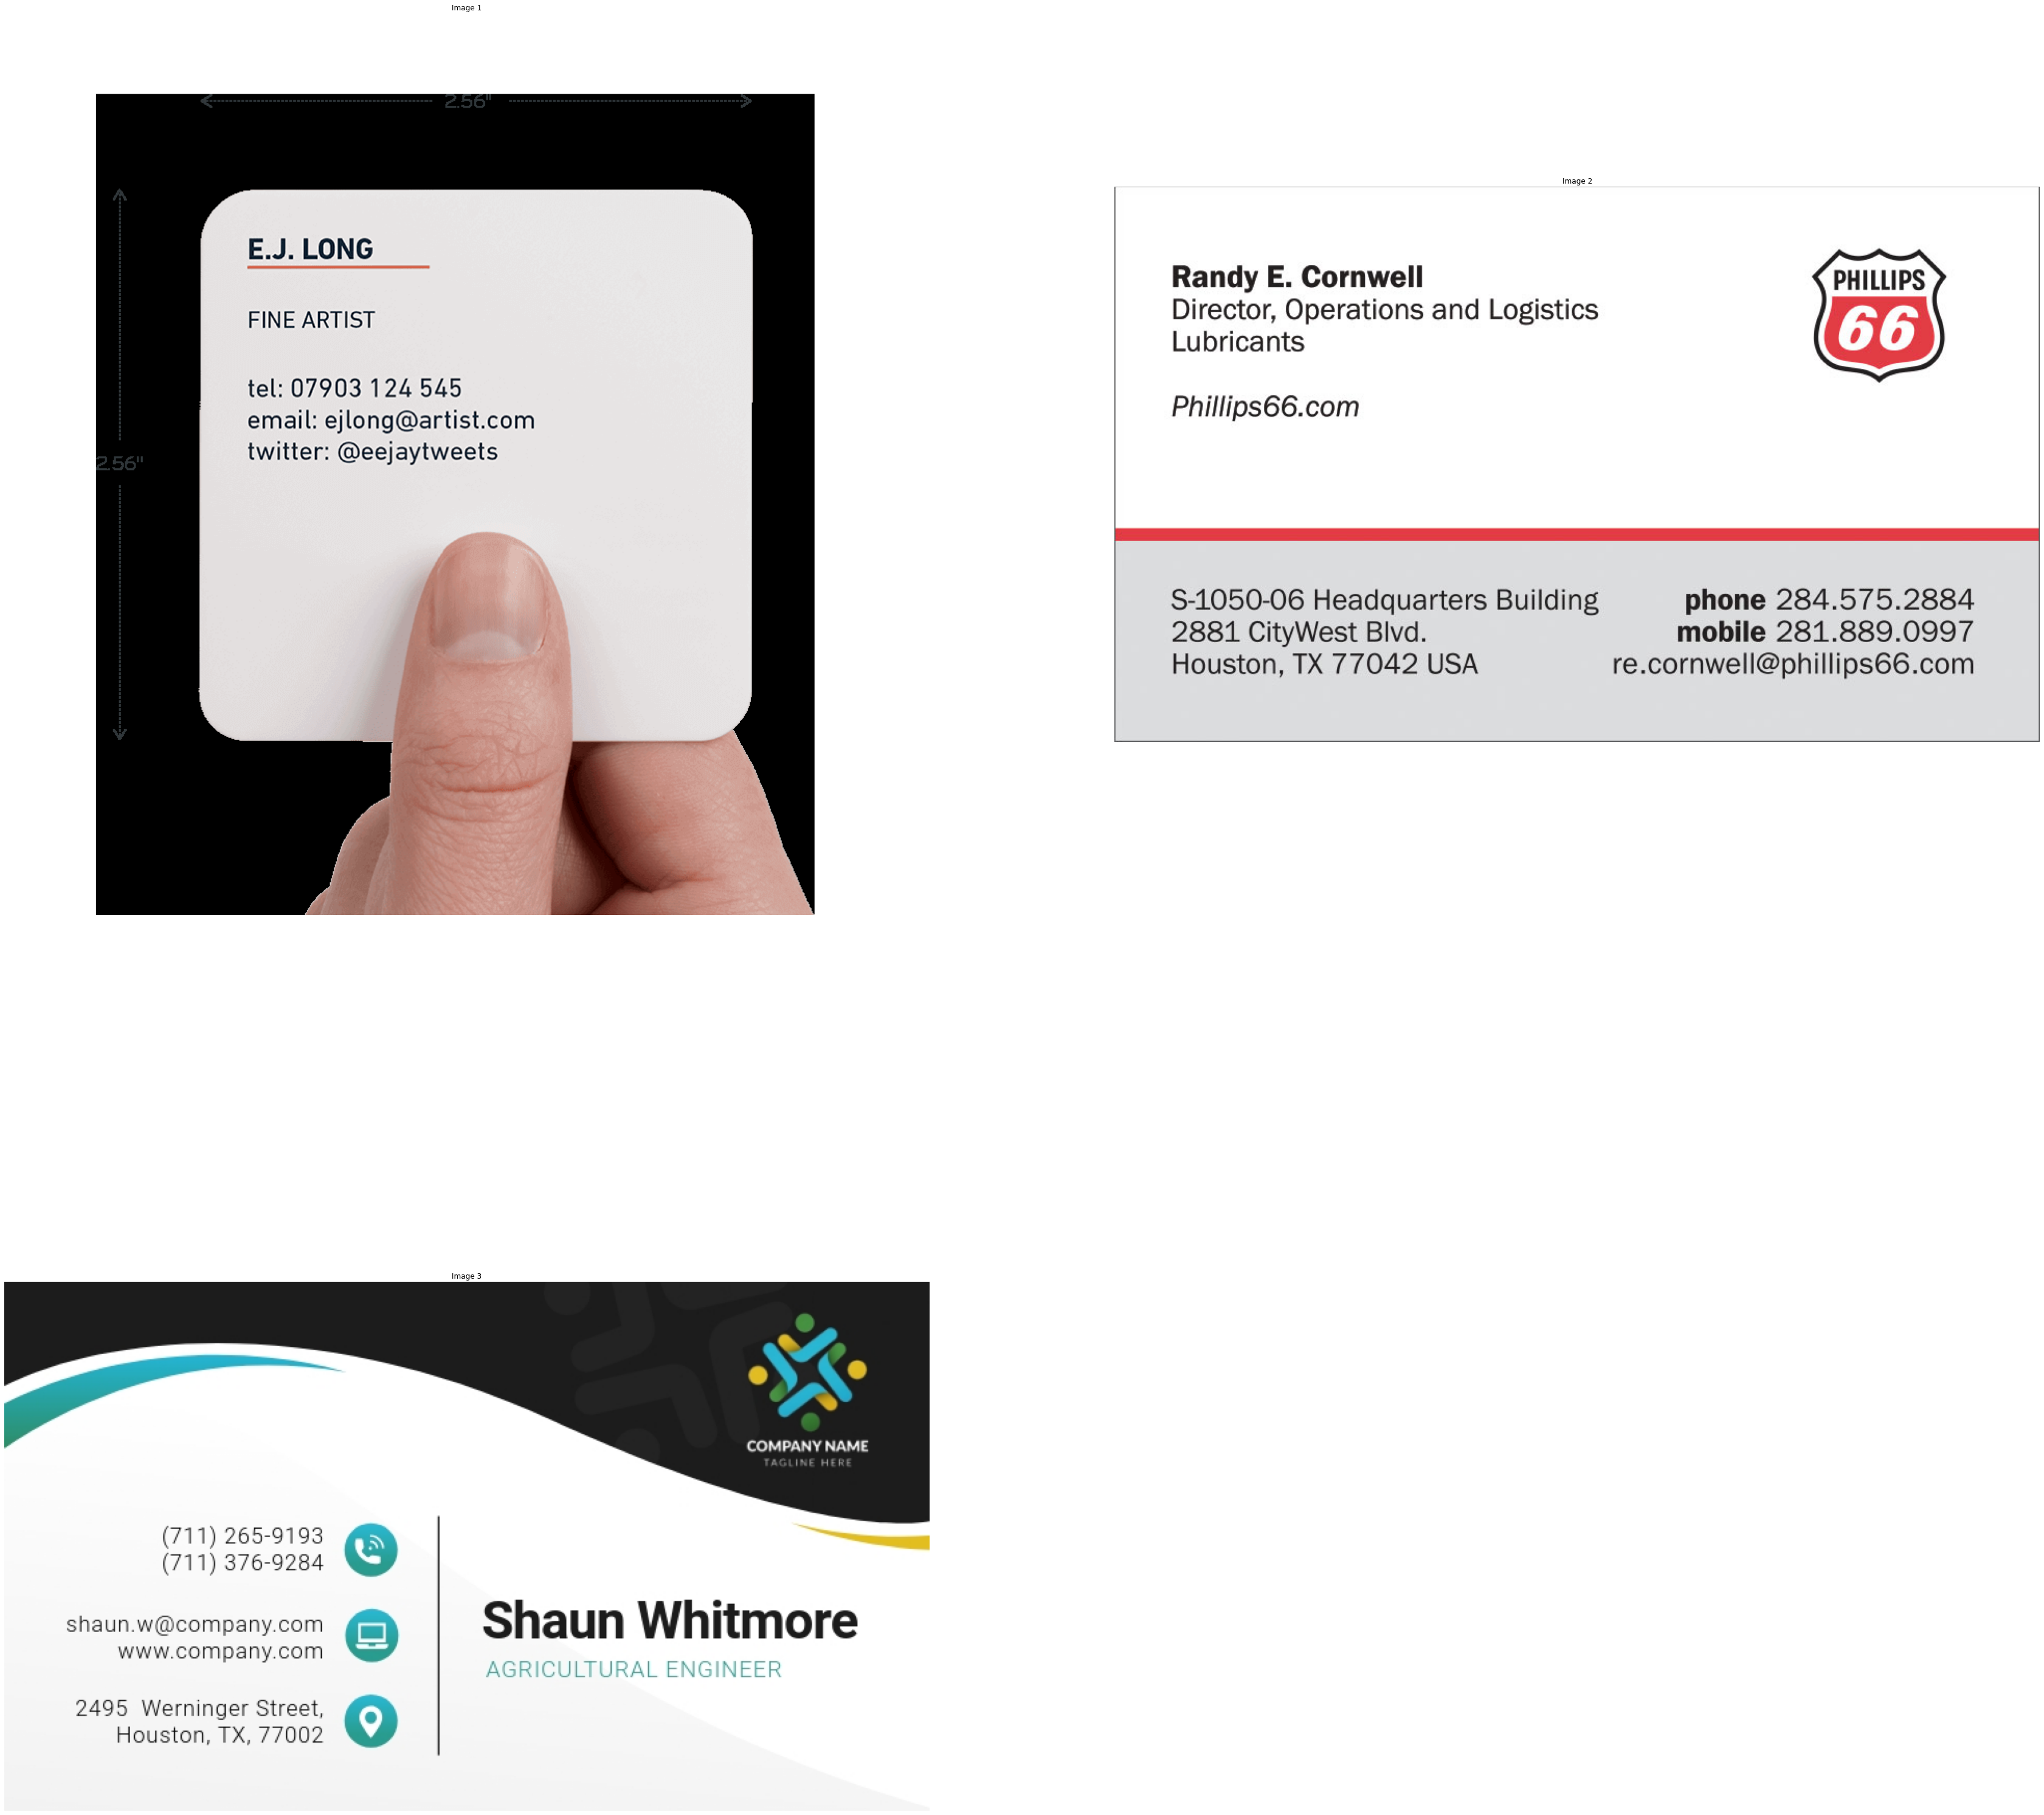

In [4]:
plt.figure(figsize=(60, 60))
count = 1
for i in pathImages:
    ax = plt.subplot(2, 2, count)
    plt.imshow(cv.cvtColor(cv.imread(i), cv.COLOR_BGR2RGB))
    plt.title('Image {:d}'.format(count))
    plt.axis("off")
    count += 1
plt.show()

## Applying OCR to detect and recognize only digits

In [5]:
digits = 'outputbase digits'

In [6]:
out_text = []
for i in pathImages:
    image = cv.imread(i)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(image, config=digits)
    out_text.append(text)

## Visualizing the results

..

07903124545
.

 



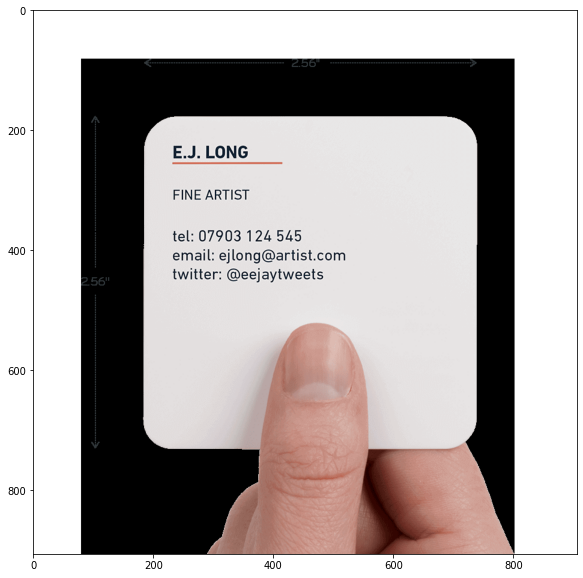

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[0]), cv.COLOR_BGR2RGB))
print(out_text[0])

 

 

.
0

 

66.
-1050-06 284.575.2884
2881. 281.889.0997

77042 .66.

 

 



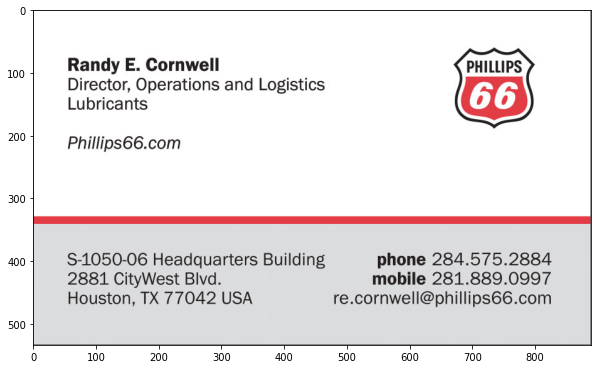

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[1]), cv.COLOR_BGR2RGB))
print(out_text[1])

 

711265-9193
711376-9284

..

.. -

2495.
77002



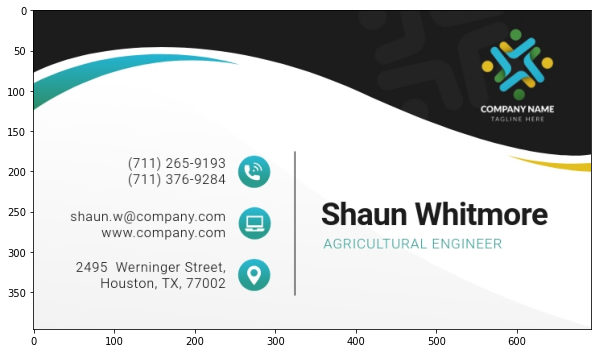

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[-1]), cv.COLOR_BGR2RGB))
print(out_text[-1])

As we can see, the OCR'ing process works well to detect only digits when required. On the other hand, we also note that there are some undesirable characters, as dots for example. To print out just digits, we will introduce the white and black list.

## Introducting white and black lists

**blacklists**

In [10]:
black_list = '-c tessedit_char_blacklist=:~,®@.-;%()}'

In [11]:
out_text = []
for i in pathImages:
    image = cv.imread(i)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(image, config=black_list)
    out_text.append(text)

EJ LONG

FINE ARTIST

tel 07903 124 545
email ejlongartistcom
twitter eejaytweets

 



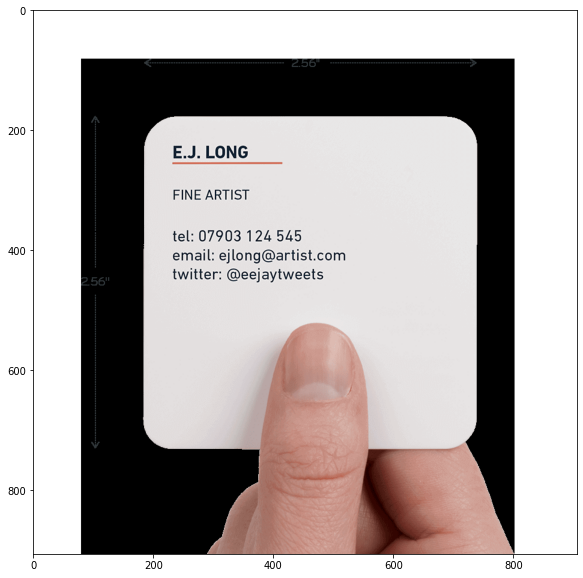

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[0]), cv.COLOR_BGR2RGB))
print(out_text[0])

 

 

Randy E Cornwell PHILLIPS
Director Operations and Logistics

 

Lubricants

Phillips66com

S105006 Headquarters Building phone 2845752884
2881 CityWest Blvd mobile 2818890997

Houston TX 77042 USA recornwellphillips66com

 

 



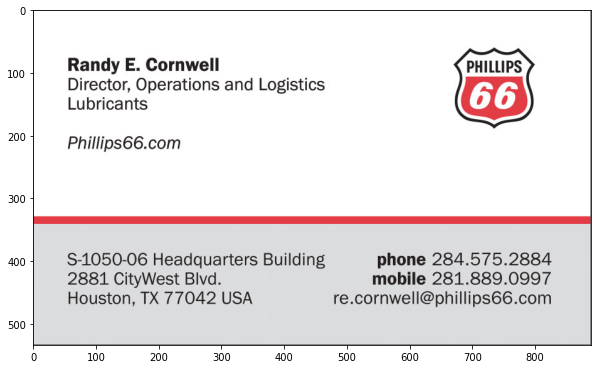

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[1]), cv.COLOR_BGR2RGB))
print(out_text[1])

e
Sm

Ud

 

711 2659193
711 3769284

shaunwcompanycom Shaun Whitmore

wwwcompanycom my

2495 Werninger Street
Houston TX 77002



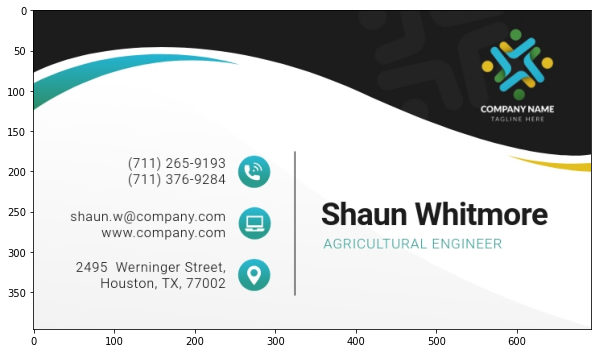

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[-1]), cv.COLOR_BGR2RGB))
print(out_text[-1])

**whitelists**

In [30]:
white_list = '-c tessedit_char_whitelist=()0123456789 '

In [31]:
out_text = []
for i in pathImages:
    image = cv.imread(i)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(image, config=white_list)
    out_text.append(text)

07903124545

 



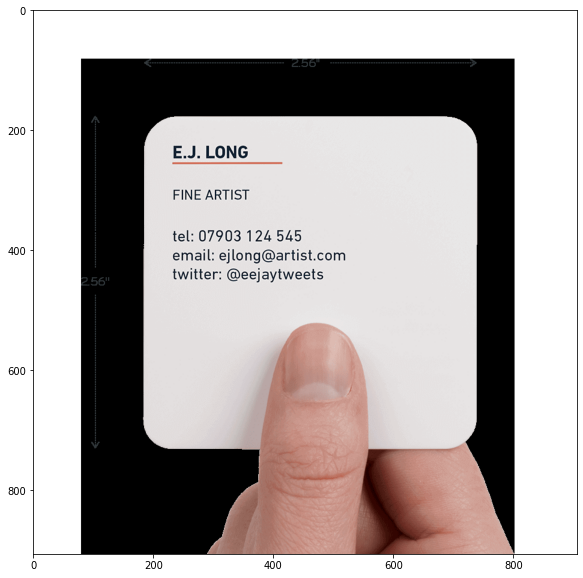

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[0]), cv.COLOR_BGR2RGB))
print(out_text[0])

 

 

0

 

66
105006 2845752884
2881 2818890997

77042 66

 

 



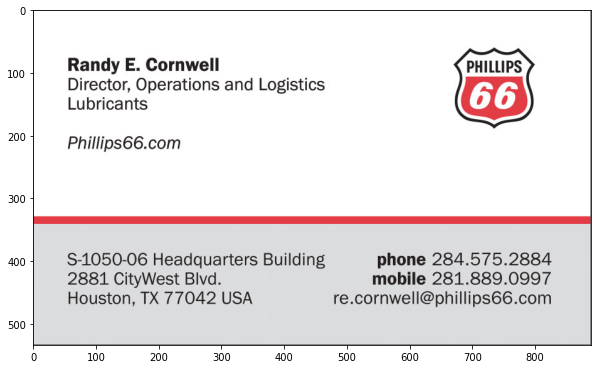

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[1]), cv.COLOR_BGR2RGB))
print(out_text[1])

 

(711)2659193
(711)3769284

2495
77002



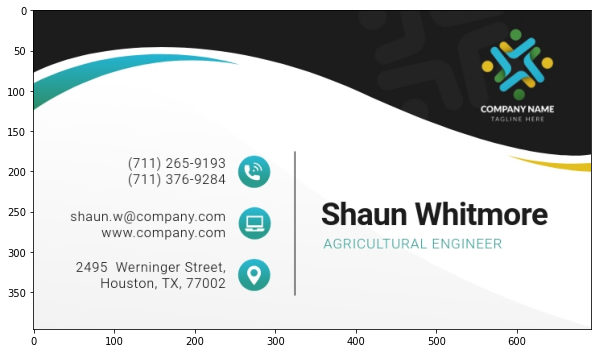

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[-1]), cv.COLOR_BGR2RGB))
print(out_text[-1])

**combining whitelist and blacklist**

In [35]:
comb = '-c tessedit_char_whitelist=()0123456789 -c tessedit_char_blacklist=:~,®@.-;%()}'

In [36]:
out_text = []
for i in pathImages:
    image = cv.imread(i)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    text = pytesseract.image_to_string(image, config=comb)
    out_text.append(text)

 

7112659193
7113769284

2495
77002



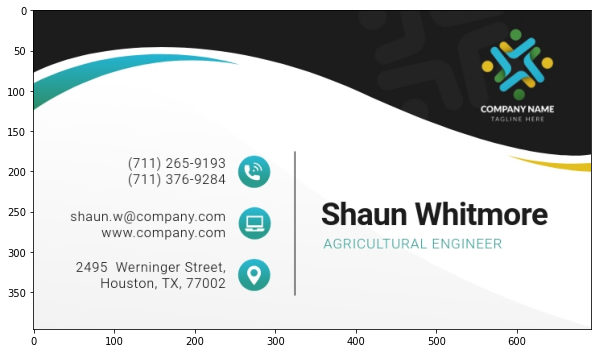

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[-1]), cv.COLOR_BGR2RGB))
print(out_text[-1])